source:https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [ ]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
# seperating columns we need and drop the rest
new_columns = ['genres','id', 'keywords', 'original_language','title', 'overview',
               'production_companies', 'release_date', 'vote_average']
df = df[new_columns]

In [ ]:
df.head()

,genres,id,keywords,original_language,title,overview,production_companies,release_date,vote_average
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,7.2
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,6.9
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,6.3
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,7.6
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,6.1


In [ ]:
df['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

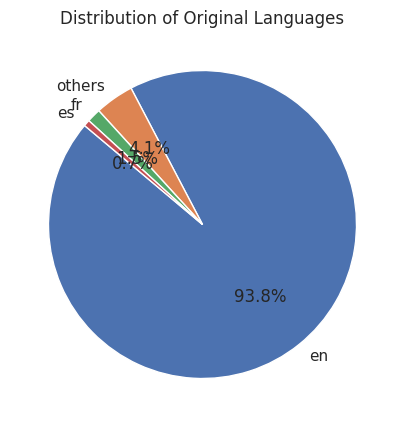

In [ ]:

# Assuming df is the name of your DataFrame
top_languages = df['original_language'].value_counts().nlargest(3).index
df['language_grouped'] = df['original_language'].apply(lambda x: x if x in top_languages else 'others')

language_counts = df['language_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Original Languages')
plt.show()

In [ ]:
# Split the genres and create a list of unique names
unique_names = set()
for entry in df['genres']:
    genres = eval(entry)  # Evaluate the string as a Python expression
    for genre in genres:
        unique_names.add(genre['name'])

unique_names_list = list(unique_names)
print(unique_names_list)

['Drama', 'Documentary', 'Animation', 'Family', 'Comedy', 'Mystery', 'Science Fiction', 'Crime', 'Horror', 'Adventure', 'Action', 'Western', 'Music', 'History', 'Fantasy', 'TV Movie', 'Romance', 'Foreign', 'War', 'Thriller']


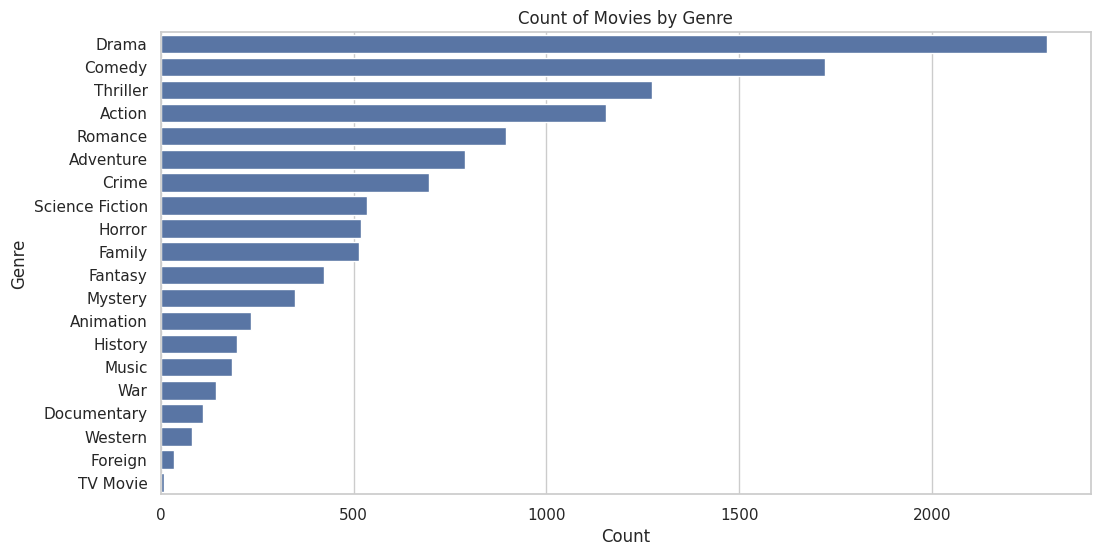

In [ ]:
# Flatten the list of genres
genres_list = [genre['name'] for row in df['genres'] for genre in eval(row)]

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(y=genres_list, order=pd.Series(genres_list).value_counts().index)
plt.title('Count of Movies by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show();

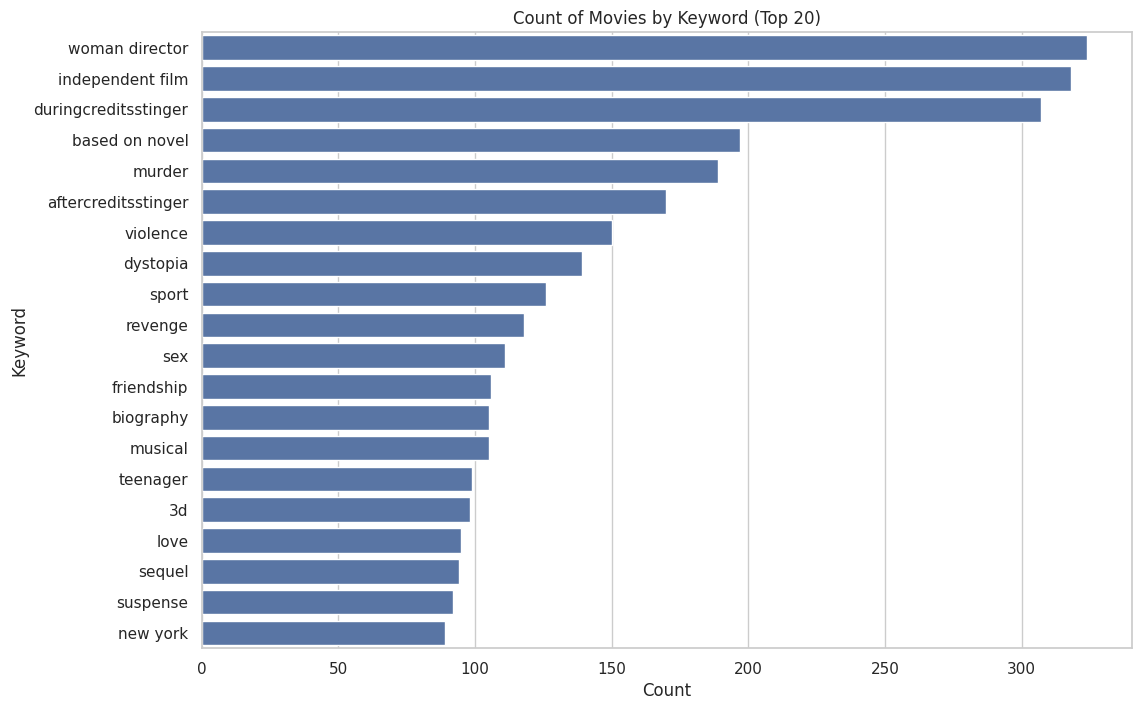

In [ ]:
# Flatten the list of keywords
keywords_list = [keyword['name'] for row in df['keywords'] for keyword in eval(row)]

# Get the first 20 keywords
top_20_keywords = pd.Series(keywords_list).value_counts().head(20)

# Create a count plot for the top 20 keywords
plt.figure(figsize=(12, 8))
sns.countplot(y=keywords_list, order=top_20_keywords.index)
plt.title('Count of Movies by Keyword (Top 20)')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

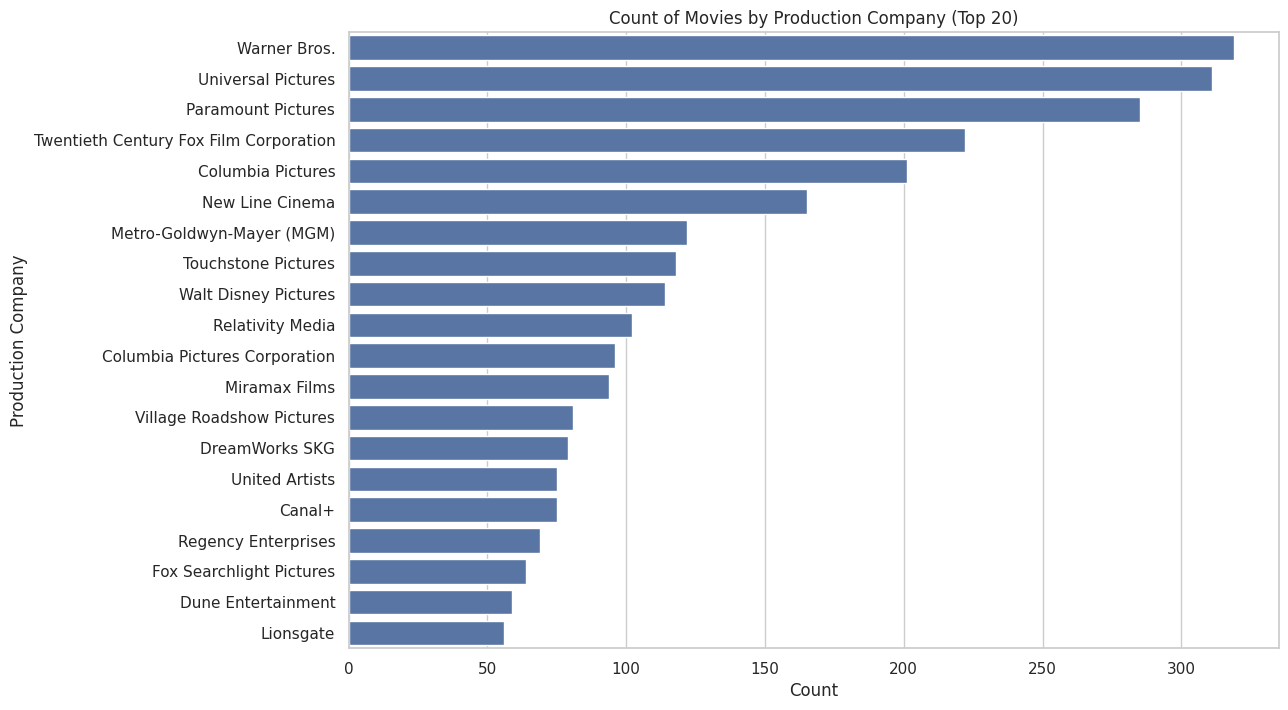

In [ ]:
sns.set_theme(style="whitegrid")

# Flatten the list of production companies
companies_list = [company['name'] for row in df['production_companies'] for company in eval(row)]

# Get the top 20 production companies
top_20_companies = pd.Series(companies_list).value_counts().head(20)

# Create a count plot for the top 20 production companies
plt.figure(figsize=(12, 8))
sns.countplot(y=companies_list, order=top_20_companies.index)
plt.title('Count of Movies by Production Company (Top 20)')
plt.xlabel('Count')
plt.ylabel('Production Company')
plt.show()

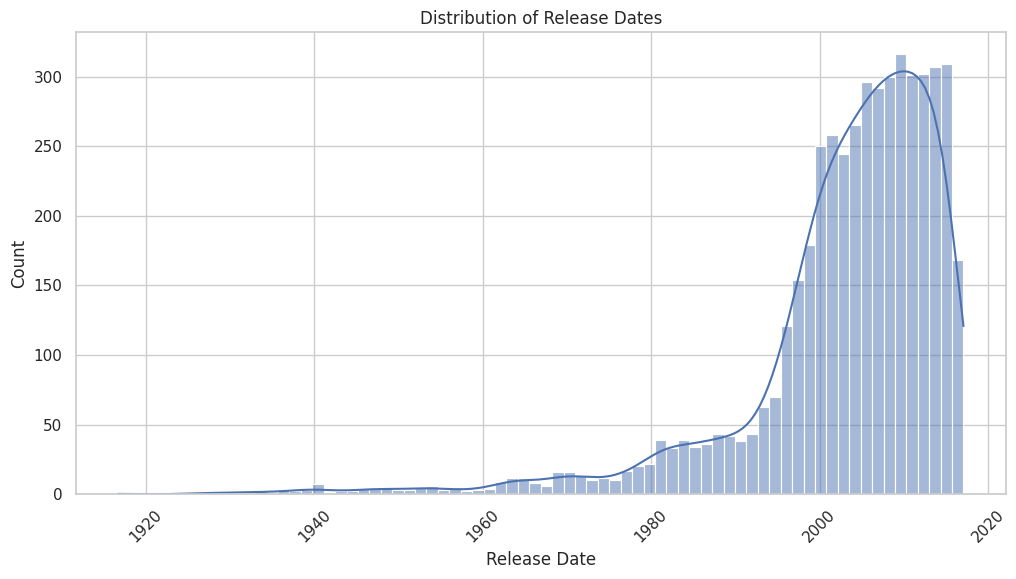

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
release_dates = pd.to_datetime(df['release_date'])
sns.histplot(data=release_dates, kde=True)
plt.title('Distribution of Release Dates')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

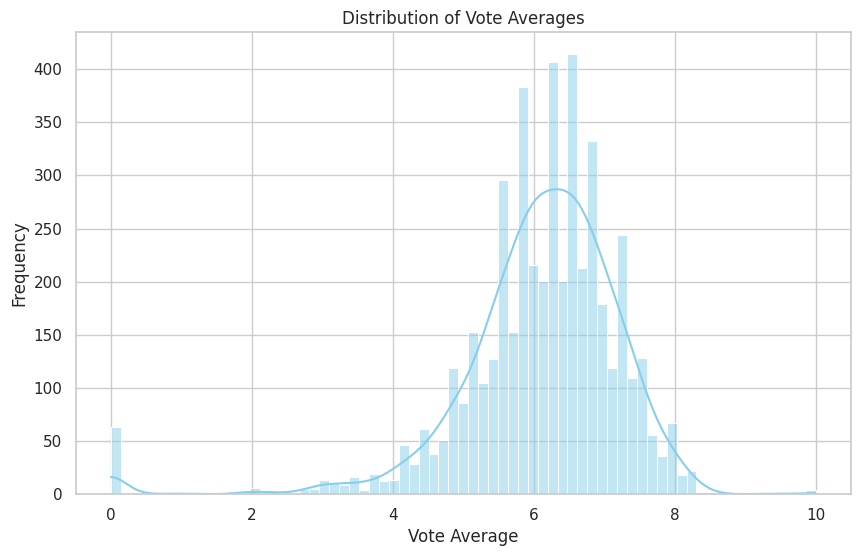

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='vote_average', kde=True, color='skyblue')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.head()

,genres,id,keywords,original_language,title,overview,production_companies,release_date,vote_average,language_grouped
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,7.2,en
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,6.9,en
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,6.3,en
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,7.6,en
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,6.1,en


In [ ]:

# Extracting and combining names without using eval
genres_extracted = df['genres'].apply(lambda x: ' '.join([(item['name']).replace(' ', '') for item in json.loads(x)]))
keywords_extracted = df['keywords'].apply(lambda x: ' '.join([item['name'].replace(' ', '') for item in json.loads(x)]))
df['tags'] = genres_extracted + ' ' + keywords_extracted

print(df['tags'])

0       Action Adventure Fantasy ScienceFiction cultur...
1       Adventure Fantasy Action ocean drugabuse exoti...
2       Action Adventure Crime spy basedonnovel secret...
3       Action Crime Drama Thriller dccomics crimefigh...
4       Action Adventure ScienceFiction basedonnovel m...
                              ...                        
4798    Action Crime Thriller unitedstates–mexicobarri...
4799                                      Comedy Romance 
4800    Comedy Drama Romance TVMovie date loveatfirsts...
4801                                                     
4802      Documentary obsession camcorder crush dreamgirl
Name: tags, Length: 4803, dtype: object


In [ ]:
movies_new_data_frame = df[['id' , 'title', 'tags']]

In [ ]:
# Create TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(df['tags'])
tfidf_matrix

<4803x9769 sparse matrix of type '<class 'numpy.float64'>'
	with 48632 stored elements in Compressed Sparse Row format>

In [ ]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

In [ ]:
# Randomly select feature names using np.random.choice
random_features = np.random.choice(feature_names, size=10, replace=False)
print(random_features)


['sapprentice' 'beagle' 'treasurehunt' 'meteorologist' 'primalfear'
 'bridegroom' 'prophet' 'childhoodtrauma' 'numberstations' 'ricepaddy']


In [ ]:
# Convert the tfidf_matrix to a DataFrame for visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

In [ ]:
print(tfidf_df)

       11  15thcentury  16thcentury  17thcentury  18thcentury  1910s  1920s  \
0     0.0          0.0          0.0          0.0          0.0    0.0    0.0   
1     0.0          0.0          0.0          0.0          0.0    0.0    0.0   
2     0.0          0.0          0.0          0.0          0.0    0.0    0.0   
3     0.0          0.0          0.0          0.0          0.0    0.0    0.0   
4     0.0          0.0          0.0          0.0          0.0    0.0    0.0   
...   ...          ...          ...          ...          ...    ...    ...   
4798  0.0          0.0          0.0          0.0          0.0    0.0    0.0   
4799  0.0          0.0          0.0          0.0          0.0    0.0    0.0   
4800  0.0          0.0          0.0          0.0          0.0    0.0    0.0   
4801  0.0          0.0          0.0          0.0          0.0    0.0    0.0   
4802  0.0          0.0          0.0          0.0          0.0    0.0    0.0   

      1930s  1940s  1950s  ...  zombie  zombieapoca

In [ ]:
# Randomly select a movie title from the DataFrame
movie_title = np.random.choice(df['title'])
movie_title

'Eddie: The Sleepwalking Cannibal'

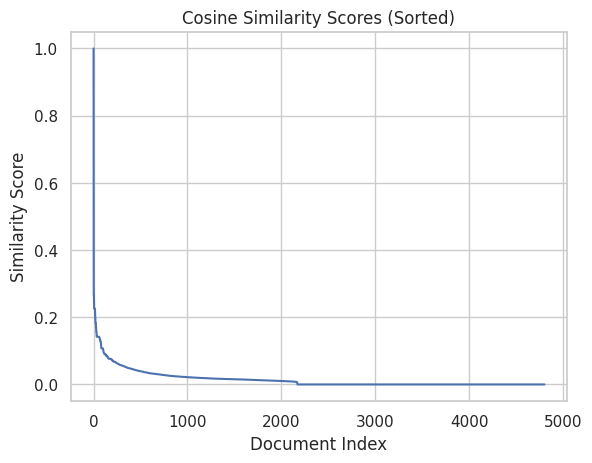

4116                                              Teeth
3720    R.L. Stine's Monsterville: The Cabinet of Souls
4584                       Love in the Time of Monsters
4552                                    Girls Gone Dead
4353                                  The Green Inferno
4629                          Some Guy Who Kills People
Name: title, dtype: object

In [ ]:
num_recommendations = 6
# Find the row index of the movie in the DataFrame
selected_row = df[df['title'] == movie_title]
idx = selected_row.index[0]

# Extract the query vector from the TF-IDF matrix
query = tfidf_matrix[idx]

# Calculate cosine similarity scores between the query vector and all other vectors
scores = cosine_similarity(query, tfidf_matrix)
scores = scores.flatten()

# Sort the scores in descending order and get the sorted indices
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_indices]

# Plot the sorted similarity scores
plt.plot(sorted_scores)
plt.xlabel('Document Index')
plt.ylabel('Similarity Score')
plt.title('Cosine Similarity Scores (Sorted)')
plt.show()

# Select the recommended movie indices and retrieve their titles from the DataFrame
recommended_idx = sorted_indices[1:num_recommendations+1]
recommended_movies = df['title'].iloc[recommended_idx]
recommended_movies

In [ ]:
def plot_similarity_scores(df, tfidf_matrix, movie_title, num_recommendations=6):
    """
    Plot the cosine similarity scores of a movie with other movies in a DataFrame.
    Return the recommended movies based on the highest similarity scores.

    Parameters:
    - df (pandas.DataFrame): DataFrame containing movie data.
    - tfidf_matrix (numpy.ndarray): TF-IDF matrix of movie plots.
    - movie_title (str): Title of the movie for which recommendations are sought.
    - num_recommendations (int): Number of recommended movies to return (default is 6).

    Returns:
    - recommended_movies (pandas.Series): Titles of recommended movies.
    """

    # Find the row index of the movie in the DataFrame
    selected_row = df[df['title'] == movie_title]
    idx = selected_row.index[0]

    # Extract the query vector from the TF-IDF matrix
    query = tfidf_matrix[idx]

    # Calculate cosine similarity scores between the query vector and all other vectors
    scores = cosine_similarity(query, tfidf_matrix)
    scores = scores.flatten()

    # Sort the scores in descending order and get the sorted indices
    sorted_indices = np.argsort(scores)[::-1]
    sorted_scores = scores[sorted_indices]

    # Plot the sorted similarity scores
    plt.plot(sorted_scores)
    plt.xlabel('Document Index')
    plt.ylabel('Similarity Score')
    plt.title('Cosine Similarity Scores (Sorted)')
    plt.show()

    # Select the recommended movie indices and retrieve their titles from the DataFrame
    recommended_idx = sorted_indices[1:num_recommendations+1]
    recommended_movies = df['title'].iloc[recommended_idx]
    print(f'\nYou may also like these {num_recommendations} movies.\n')
    return recommended_movies

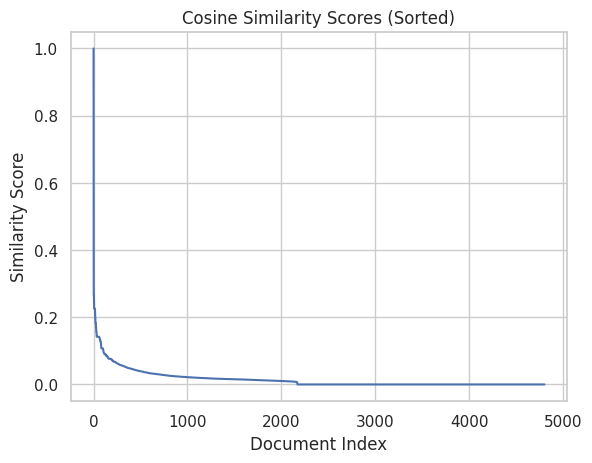


You may also like these 6 movies.



4116                                              Teeth
3720    R.L. Stine's Monsterville: The Cabinet of Souls
4584                       Love in the Time of Monsters
4552                                    Girls Gone Dead
4353                                  The Green Inferno
4629                          Some Guy Who Kills People
Name: title, dtype: object

In [ ]:
plot_similarity_scores(movies_new_data_frame, tfidf_matrix, movie_title, num_recommendations=6)

In [ ]:
# Take the pickle dump of the results for later use
pickle.dump(movies_new_data_frame,open('movies.pkl','wb'))
pickle.dump(movies_new_data_frame.to_dict(),open('movie_dict.pkl','wb'))
pickle.dump(sorted_scores,open('similarity.pkl','wb'))